In [1]:
from lblcrn.homogenous_crn.solution import *
from lblcrn.homogenous_crn.sym import *
from lblcrn.homogenous_crn.xps import *
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid


In [2]:
# 1e-6_rt
sols = []
sm = SpeciesManager()

#[535.0 , 532.2 , 530.9 , 530.0 , 531.6 ,  531.6 ,  533.2, 535.0]
#[y1, x2, x3, x4, x53, x54, x6, x7]
y1 = sm.sp('y1', Orbital('1s', 535.0), {0:1.0000})
x2 = sm.sp('x2', Orbital('1s', 532.2), {0:0})
x3 = sm.sp('x3', Orbital('1s', 530.9), {0:0})
x4 = sm.sp('x4', Orbital('1s', 530.0), {0:0.25})
x53 = sm.sp('x53', Orbital('1s', 531.6), {0:0})
x54 = sm.sp('x54', Orbital('1s', 531.6), {0:0})
x6 = sm.sp('x6', Orbital('1s', 533.2), {0:0})
x7 = sm.sp('x7', Orbital('1s', 535.0), {0:0})

multipliers = [0.1, 0.5, 1, 5, 10]
default_rxn_consts = [3.207654, 1.363342, 6.220646, 0.160755, 0.299507, 0.167130, 1.939313, 0.515646, 0.733491, 0.311754, 1.038423, 0.962999, 0.002342,426.922895]

# System Solving
This only needs to be run if a pickled solution is not available.

In [ ]:
# Test code that will be moved into a module
for i in range(len(default_rxn_consts)):
    for j in range(5):
        scaled = list(default_rxn_consts)
        scaled[i] *= multipliers[j]
        
        rsys = RxnSystem(
            Rxn(x4 + y1, x54, scaled[0]), # 0
            Rxn(x3 + y1, x53, scaled[1]), # 1
            Rxn(x54, x3 + x3, scaled[2]), # 2
            Rxn(x3 + x3, x54, scaled[3]), # 3
            Rxn(x53, x2 + x3, scaled[4]), # 4
            Rxn(x54, x2 + x4, scaled[5]), # 5
            Rxn(x2, y1, scaled[6]), # 6
            Rxn(y1, x2, scaled[7]), # 7
            Rxn(x53, y1 + x3, scaled[8]), # 8
            Rxn(x54, x4 + y1, scaled[9]), # 9
            Rxn(x53 + y1, x6, scaled[10]), # 10
            Rxn(x6, x53 + y1, scaled[11]), # 11
            Rxn(x4 + x4, x7, scaled[12]), # 12
            Rxn(x7, x4 + x4, scaled[13]), # 13
            sm
        )
        s = solve(rsys, time=10000)
        sols.append(s)
        print('Solved for ('+str(i)+', '+str(j)+')')
        print(scaled)
        print('\n')

In [ ]:
sols[0].basic_plot()

In [ ]:
import pickle
with open('../nickel_constsv2_noexp.pkl', 'wb') as f:
    pickle.dump(sols, f)

In [ ]:
x = read_new_data('../data/1e-6_rt.txt')
j = 0
for i, s in enumerate(sols):
    print('Const: '+str(int(i / len(multipliers)))+' Multiplier: '+str(multipliers[j]))
    j += 1
    j = j % len(multipliers)
    
    s.set_experimental(x[0])

In [ ]:
import pickle
with open('../nickel_consts.pkl', 'wb') as f:
    pickle.dump(sols, f)

# Analysis

In [3]:
sols = pickle.load(open('../data/nickel_constsv2_noexp.pkl', 'rb'))

In [4]:
x = read_new_data('../data/ag_100e-3_25.txt', be=0)
j = 0
for i, s in enumerate(sols):
    j += 1
    j = j % len(multipliers)
    
    s.set_experimental(x[0])

In [5]:
len(sols[0].distributions)

0

In [6]:
for s in sols:
    s.ignore = [y1]
    s.process()

In [7]:
print(sols[0].xps.intensity)
print(len(sols[0].xps.intensity))
print(sols[0].resampled_binding_energies)
print(len(sols[0].envelope))
print(sols[0].envelope)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0019999999999527063, 0.004000000000019099, 0.009999999999990905, 0.021999999999934516, 0.04800000000000182, 0.10199999999997544, 0.20800000000008367, 0.4130000000000109, 0.7930000000000064, 1.4710000000000036, 2.6549999999999727, 4.63799999999992, 7.838000000000079, 12.807000000000016, 20.26699999999994, 31.000000000000114, 45.74199999999996, 65.03800000000012, 88.93399999999997, 116.68400000000008, 146.40700000000004, 175.16899999999987, 199.29999999999995, 214.93899999999996, 219.55200000000002, 212.40099999999995, 194.93200000000002, 170.24699999999996, 142.4860000000001, 115.39999999999998, 91.952, 74.11200000000008, 62.774999999999864, 58.11800000000005, 59.93799999999999, 67.78199999999993, 81.04200000000003, 98.81299999999999, 120.07899999999995, 143.61000000000013, 168.03999999999996, 192.096, 214.8560000000001, 236.0580000000001, 256.17100000000005, 276.28999999999996, 297.871, 322.00700000000006, 348.947, 377.87400000000014

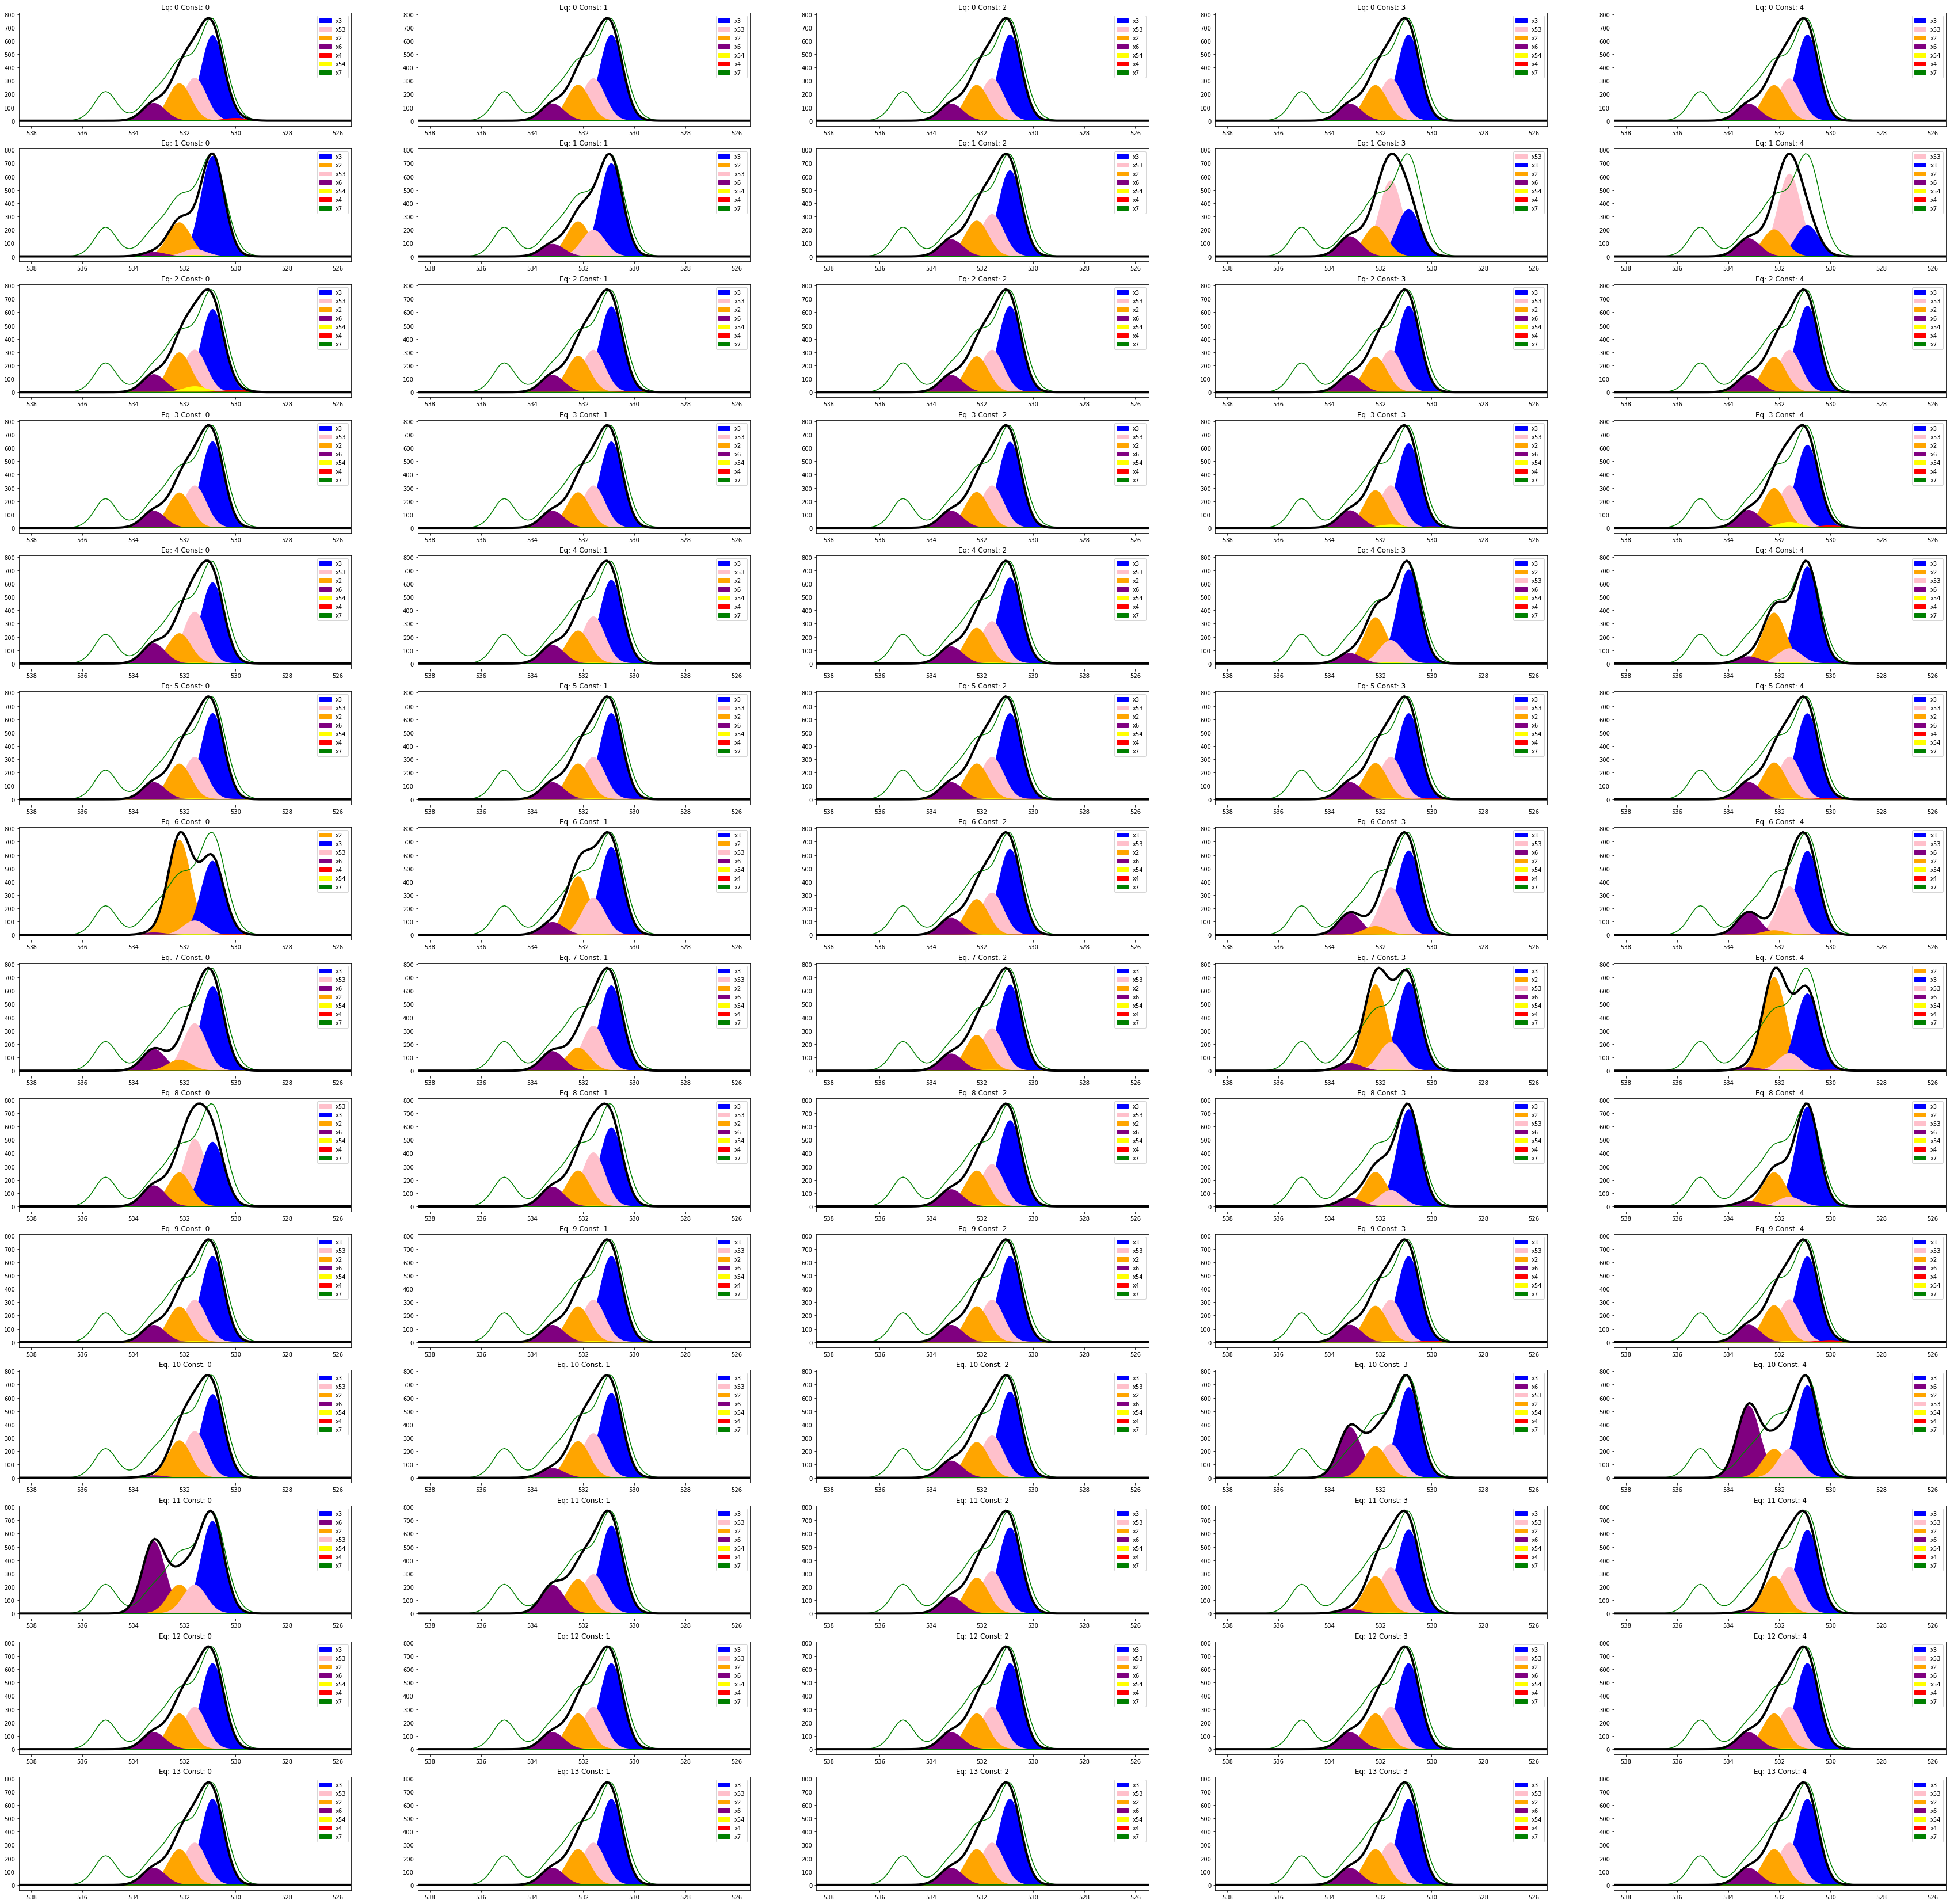

In [8]:
fig, axes = plt.subplots(nrows=14, ncols=5, figsize=(60,60))
for i in range(len(sols)):
    sols[i].plot_gaussian(envelope=True, resample_envelope=True, overlay=True, ax=axes[int(i/5), int(i%5)], title=('Eq: ' + str(int(i/5)) + ' Const: ' + str(i % 5)))
plt.show()

## RMSE Comparison

In [9]:
rmses_list = []
for i in range(len(default_rxn_consts)):
    rmses_list.append([])
    for j in range(5):
        rmses_list[i].append(sols[i*5 + j].rmse())
rmses = pd.DataFrame(rmses_list, columns=['0.1', '0.5', '1', '5', '10'])
rmses

,0.1,0.5,1,5,10
0,67.059046,68.515871,68.735503,68.918093,68.941385
1,90.355478,71.572364,68.735503,102.438196,120.467919
2,69.574415,68.667796,68.735503,68.831767,68.846648
3,68.846645,68.790974,68.735503,68.752532,69.574421
4,72.562794,70.456919,68.735503,67.097538,69.081677
5,68.815398,68.779708,68.735503,68.394838,68.001054
6,103.001876,72.524497,68.735503,85.459885,89.559199
7,83.368612,74.077998,68.735503,94.055520,100.101719
8,86.926784,74.032233,68.735503,79.879153,87.549778
9,68.868608,68.809088,68.735503,68.182230,67.571884


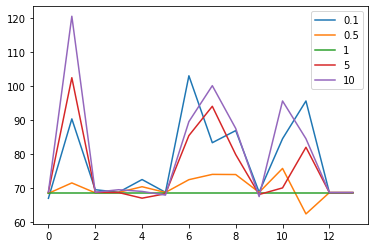

In [10]:
rmses.plot()

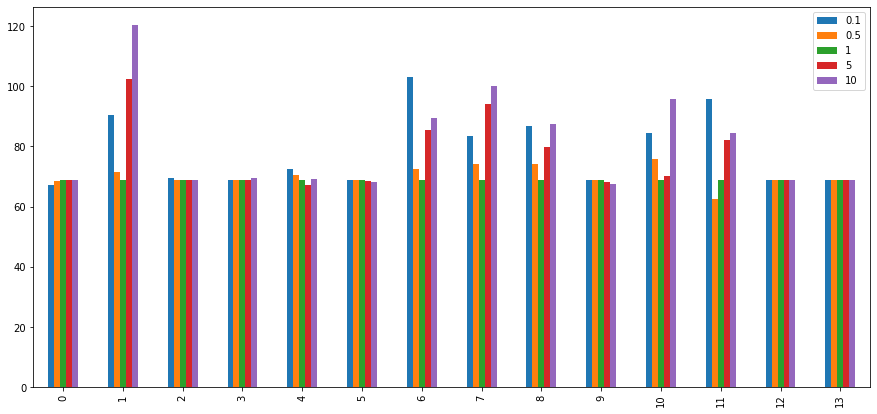

In [11]:
rmses.plot.bar(figsize=(15,7))

In [12]:
rmses_min = rmses.agg(['min', 'idxmin']).T
rmses_min

,min,idxmin
0.1,67.059046,0.0
0.5,62.479612,11.0
1,68.735503,0.0
5,67.097538,4.0
10,67.571884,9.0


0, 0.1


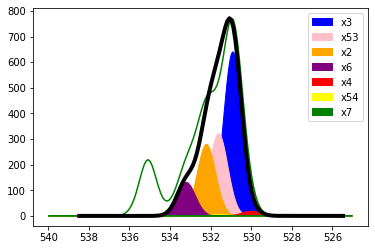

0, 1


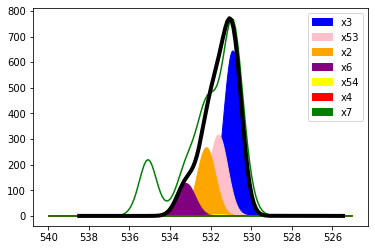

9, 10


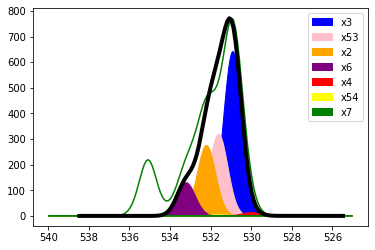

In [36]:
print('0, 0.1')
sols[0].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
print('0, 1')
sols[2].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
print('9, 10')
sols[49].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)

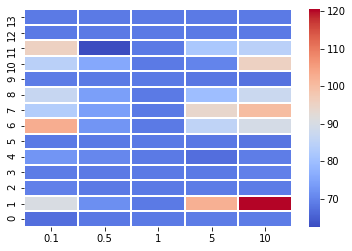

In [14]:
rmse_heatmap = sb.heatmap(rmses, cmap='coolwarm', linewidths=1)
rmse_heatmap.invert_yaxis()

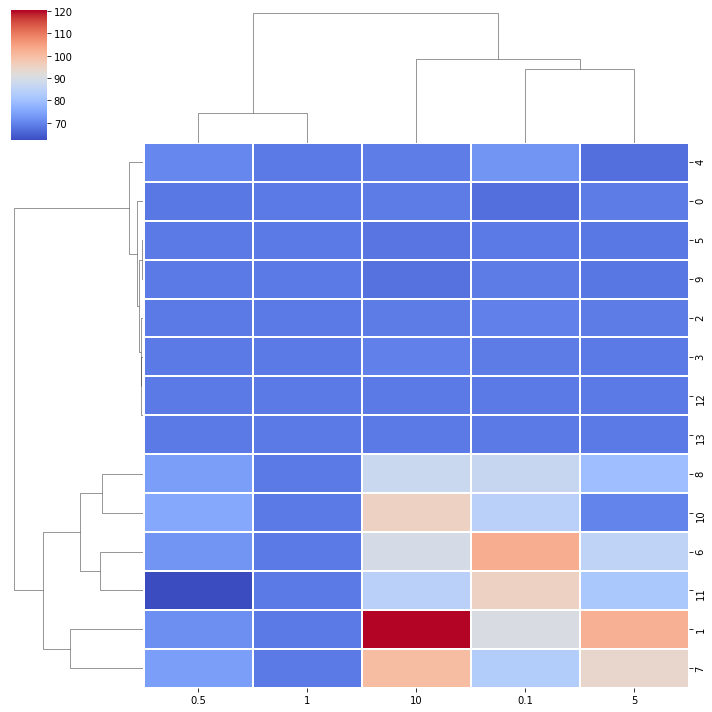

In [15]:
rmse_clustermap = sb.clustermap(rmses, cmap='coolwarm', linewidths=1)

## MAE Comparison

In [16]:
maes_list = []
for i in range(len(default_rxn_consts)):
    maes_list.append([])
    for j in range(5):
        maes_list[i].append(sols[i*5 + j].mae())
maes = pd.DataFrame(maes_list, columns=['0.1', '0.5', '1', '5', '10'])
maes

,0.1,0.5,1,5,10
0,40.459214,42.041420,42.260616,42.438495,42.460827
1,55.502874,42.422681,42.260616,61.344177,70.085215
2,42.431812,42.186302,42.260616,42.324139,42.332379
3,42.332384,42.299889,42.260616,42.191995,42.431802
4,44.961803,43.601051,42.260616,37.899195,39.837710
5,42.336345,42.302704,42.260616,41.928009,41.520771
6,64.562213,44.863292,42.260616,49.777348,51.247936
7,48.978507,45.091419,42.260616,55.664129,62.149239
8,52.952251,45.717943,42.260616,48.918397,53.819751
9,42.390679,42.332632,42.260616,41.697397,41.023471


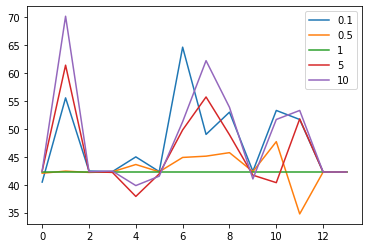

In [17]:
maes.plot()

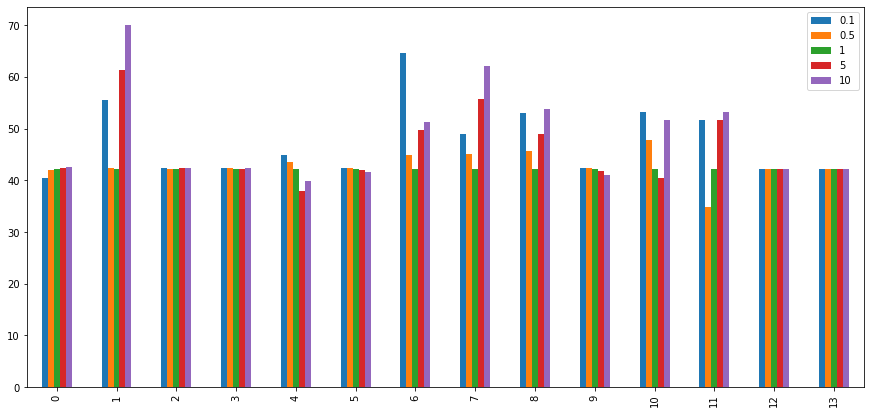

In [18]:
maes.plot.bar(figsize=(15,7))

In [19]:
maes_min = maes.agg(['min', 'idxmin']).T
maes_min

,min,idxmin
0.1,40.459214,0.0
0.5,34.774838,11.0
1,42.260616,0.0
5,37.899195,4.0
10,39.837710,4.0


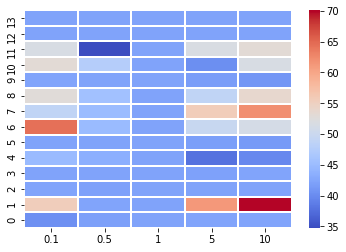

In [20]:
mae_heatmap = sb.heatmap(maes, cmap='coolwarm', linewidths=1)
mae_heatmap.invert_yaxis()

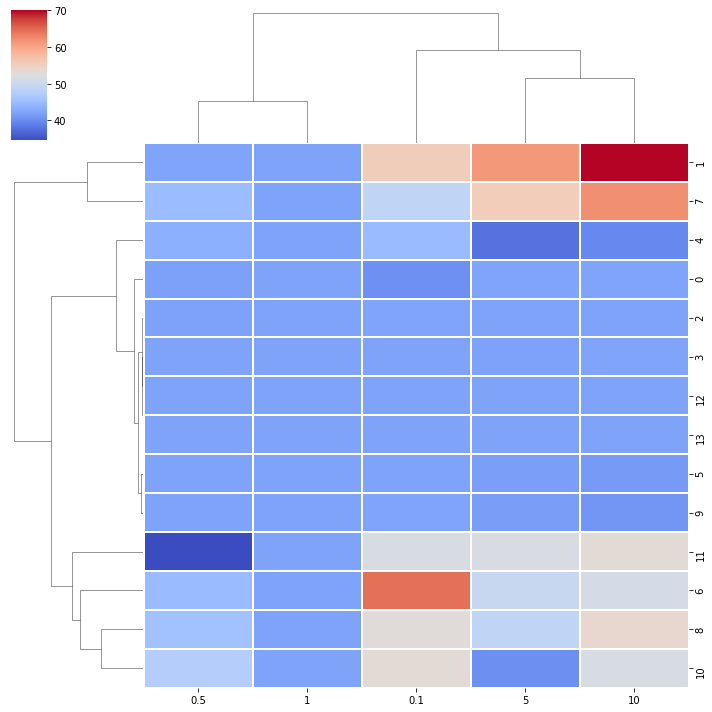

In [21]:
mae_clustermap = sb.clustermap(maes, cmap='coolwarm', linewidths=1)

## MAE Comparison

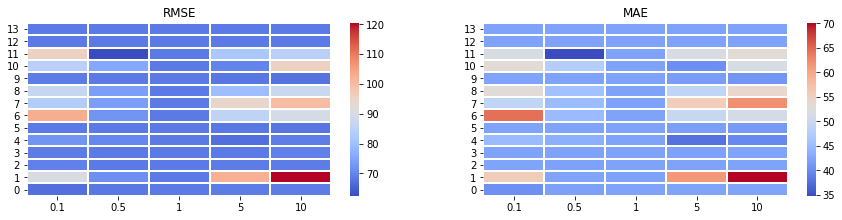

In [22]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

rmse_comp = sb.heatmap(rmses, cmap='coolwarm', linewidths=1, ax=ax1)
mae_comp = sb.heatmap(maes, cmap='coolwarm', linewidths=1, ax=ax2)
rmse_comp.invert_yaxis()
mae_comp.invert_yaxis()

ax1.title.set_text('RMSE')
ax2.title.set_text('MAE')

## Integral Difference Comparison

In [23]:
integrals_list = []
for i in range(len(default_rxn_consts)):
    integrals_list.append([])
    for j in range(5):
        integrals_list[i].append(sols[i*5 + j].integral_diff())
integral_diffs = pd.DataFrame(integrals_list, columns=['0.1', '0.5', '1', '5', '10'])
integral_diffs

,0.1,0.5,1,5,10
0,394.256738,428.318500,432.889341,436.602580,437.069666
1,724.955937,549.793179,432.889341,497.715926,625.601360
2,359.337470,423.336668,432.889341,440.870189,441.890811
3,441.890870,437.840298,432.889341,397.059873,359.337365
4,415.874998,424.334966,432.889341,490.859958,521.873995
5,434.565832,433.820447,432.889341,425.526884,416.516308
6,386.562379,302.634032,432.889341,586.333826,610.172642
7,573.417735,504.323566,432.889341,174.831822,340.491694
8,387.516716,373.422669,432.889341,640.830993,703.843574
9,435.603925,434.393041,432.889341,421.149689,407.144401


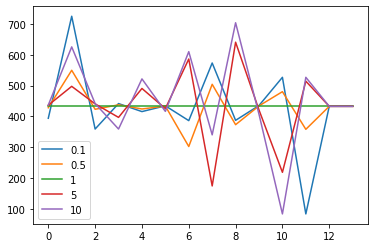

In [24]:
integral_diffs.plot()

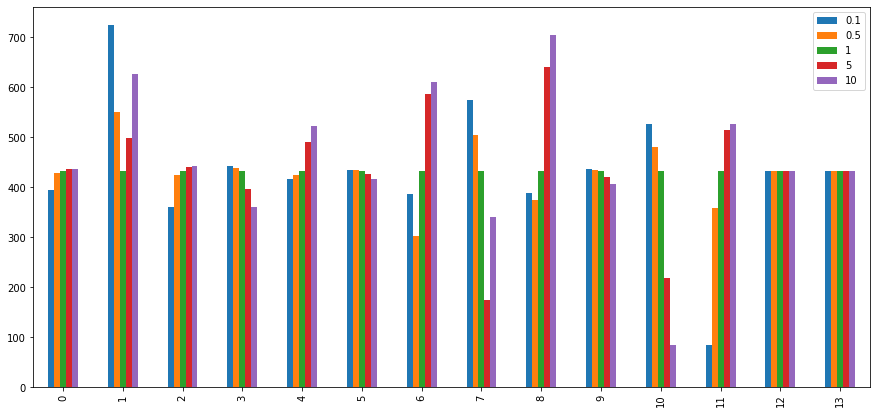

In [25]:
integral_diffs.plot.bar(figsize=(15,7))

In [26]:
integral_diffs_min = integral_diffs.agg(['min', 'idxmin']).T
integral_diffs_min

,min,idxmin
0.1,84.157032,11.0
0.5,302.634032,6.0
1,432.889341,0.0
5,174.831822,7.0
10,84.158035,10.0


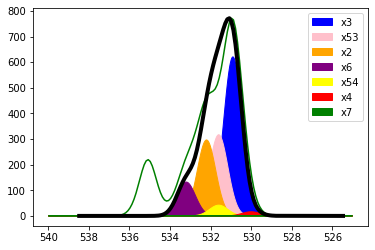

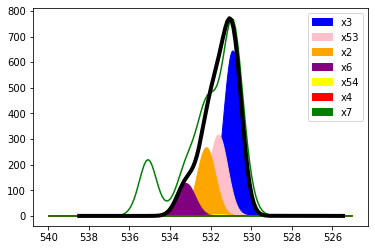

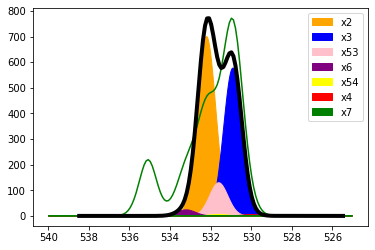

In [27]:
sols[10].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
sols[2].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
sols[39].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)

## Peak Comparison

In [28]:
real_max_arg = signal.argrelmax(np.array(sols[0].xps.intensity))
print(real_max_arg)
print(np.array(sols[0].xps.binding_energy)[real_max_arg])
real_peak = 531.2

(array([34, 75]),)
[535.075 530.975]


In [29]:
peaks_list = []
for i in range(len(default_rxn_consts)):
    peaks_list.append([])
    for j in range(5):
        s = sols[i*5 + j]
        max_arg = signal.argrelmax(np.array(s.envelope))
        bes = s.resampled_binding_energies[max_arg]
        print('max arg:', max_arg)
        print('max binding energy:', bes)
        if len(bes) == 1:
            peaks_list[i].append(abs(bes[0] - real_peak))
        else:
            peaks_list[i].append(1)    
        
peaks = pd.DataFrame(peaks_list, columns=['0.1', '0.5', '1', '5', '10'])

max arg: (array([56]),)
max binding energy: [531.075]
max arg: (array([56]),)
max binding energy: [531.075]
max arg: (array([56]),)
max binding energy: [531.075]
max arg: (array([56]),)
max binding energy: [531.075]
max arg: (array([56]),)
max binding energy: [531.075]
max arg: (array([54]),)
max binding energy: [530.875]
max arg: (array([55]),)
max binding energy: [530.975]
max arg: (array([56]),)
max binding energy: [531.075]
max arg: (array([61]),)
max binding energy: [531.575]
max arg: (array([61]),)
max binding energy: [531.575]
max arg: (array([56]),)
max binding energy: [531.075]
max arg: (array([56]),)
max binding energy: [531.075]
max arg: (array([56]),)
max binding energy: [531.075]
max arg: (array([56]),)
max binding energy: [531.075]
max arg: (array([56]),)
max binding energy: [531.075]
max arg: (array([56]),)
max binding energy: [531.075]
max arg: (array([56]),)
max binding energy: [531.075]
max arg: (array([56]),)
max binding energy: [531.075]
max arg: (array([56]),)
max 

In [30]:
peaks

,0.1,0.5,1,5,10
0,0.125,0.125,0.125,0.125,0.125
1,0.325,0.225,0.125,0.375,0.375
2,0.125,0.125,0.125,0.125,0.125
3,0.125,0.125,0.125,0.125,0.125
4,0.125,0.125,0.125,0.225,1.000
5,0.125,0.125,0.125,0.125,0.125
6,1.000,0.125,0.125,1.000,1.000
7,1.000,0.125,0.125,1.000,1.000
8,0.175,0.025,0.125,0.225,0.225
9,0.125,0.125,0.125,0.125,0.125


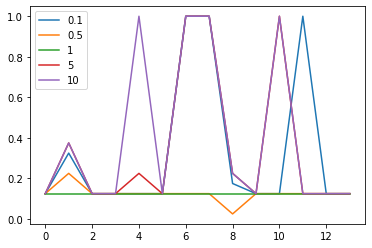

In [31]:
peaks.plot()

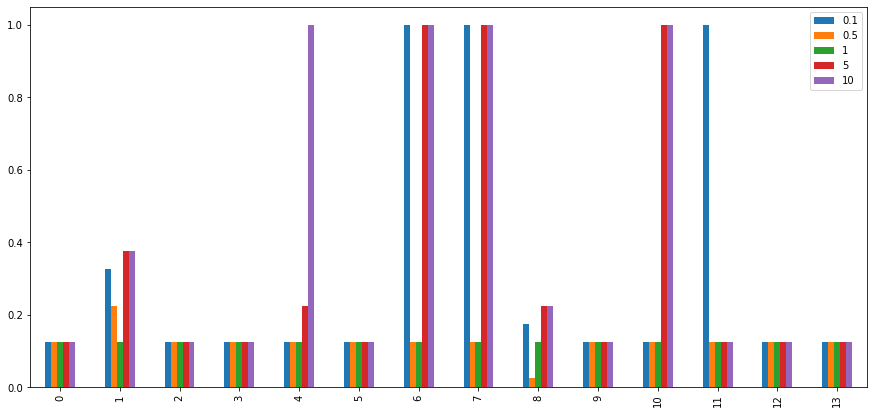

In [32]:
peaks.plot.bar(figsize=(15,7))

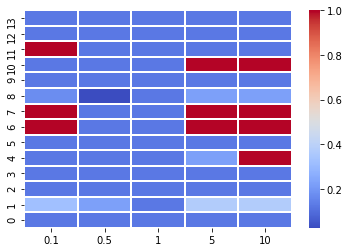

In [33]:
peaks_heatmap = sb.heatmap(peaks, cmap='coolwarm', linewidths=1)
peaks_heatmap.invert_yaxis()

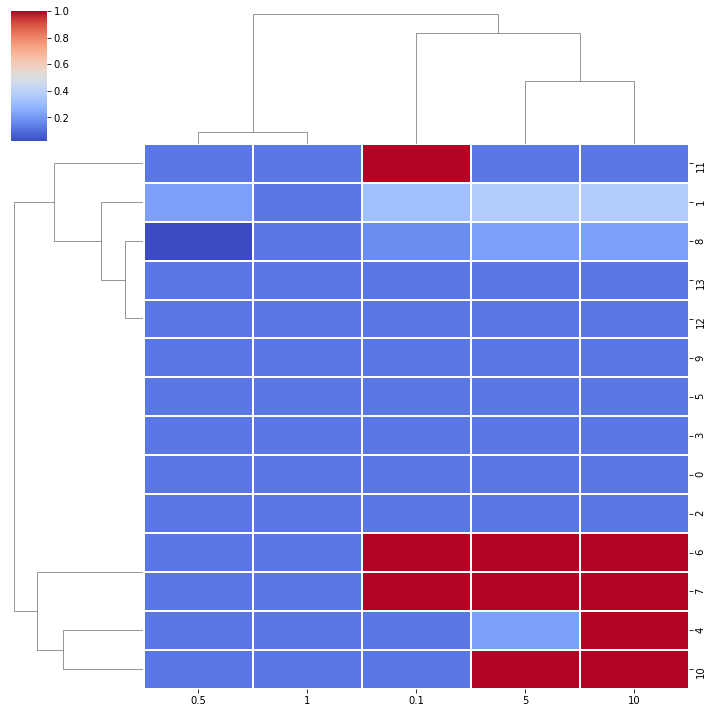

In [34]:
peaks_clustermap = sb.clustermap(peaks, cmap='coolwarm', linewidths=1)

Equations 0, 2, 3, 4, 9 , 12, 13 have the least impact on the overall system. Changes to their constant values barely affect their respective RMSEs and peak locations.

In [35]:
sols[50].names
sols[50].final_state().items()

dict_items([(x4, 0.0008887649064402507), (x7, -5.420061535783056e-07), (y1, 0.4221553858748809), (x2, 0.13928093272576714), (x3, 0.3116576906553475), (x6, 0.007904534617648933), (x53, 0.17364229306062323), (x54, 0.002510059938005285)])